# Framework for dissertation results

## Objective
Generate final results for the dissertation.

## Steps
- [ ] Load the arrays from pickle
- [ ] Extract the arrays
- [ ] Instantiate the class `
- [ ] Perform Training
- [ ] Plot the results


## 1. File with information about ICO

In [217]:
import pandas as pd
import os
import re
import pytz
from datetime import datetime, timedelta

In [221]:
df_info = pd.read_csv('lista_ico_2020-08-17_tab3.csv', sep=',')
df_info.ico = df_info.ico.str.upper()
df_info.ico = df_info.ico.str.replace(' ', '')

In [222]:
df_info.head()

,ico,adress,fraud,start_date,market_start_date,diff_days,market_days,size_ok,price_zero,Market Cap,o_concur,biggest_holder,exchange,contract,date_analysis,code,site,social_media
0,0X,0xe41d2489571d322189246dafa5ebde1f4699f498,0,2017-11-08,2017-08-15,4,1140,NaN,NaN,45.0,x,2,6,14,2018-11-02,NaN,NaN,NaN
1,AELF,0xbf2179859fc6d5bee9bf9158632dc51678a4100e,0,2017-12-18,2017-12-21,3,1012,NaN,NaN,154.0,x,13,10,0,2018-06-19,NaN,NaN,NaN
2,AMPLEFORTH,0xd46ba6d942050d489dbd938a2c909a5d5039a161,0,2019-06-14,2019-06-27,13,459,NaN,NaN,47.0,x,3,4,20,2019-12-24,NaN,NaN,NaN
3,ANKR,0x8290333cef9e6d528dd5618fb97a76f268f3edd4,0,2019-02-21,2019-05-03,12,573,NaN,NaN,170.0,x,11,7,41,2019-01-09,NaN,NaN,NaN
4,BANCOR,0x1f573d6fb3f13d689ff844b4ce37794d79a7ff1c,0,2017-10-06,2017-12-06,2,1204,NaN,NaN,61.0,x,2,11,7,2017-09-12,NaN,NaN,NaN


## 2. Renaming files

In [11]:
import os
os.listdir(path_to_files)[:5]

['LAMONEDA.csv',
 'ORIGINTRAIL.csv',
 'MONEYTOKEN.csv',
 'TIERION.csv',
 'CELSIUS.csv']

In [12]:
files_ready = True

In [13]:
if not files_ready:
    for csv in sorted(os.listdir(path_to_files)):
        ico_name_search = re.search('(\w+)_T_', csv, re.IGNORECASE)
        if re.search('(\w+)_T_', csv, re.IGNORECASE):
            print(csv)#, ico_name)
            ico_name = ico_name_search.group(1)
            os.rename(f'{path_to_files}{csv}',f'{path_to_files}{ico_name}.csv') 

## 3. Load data from pickle

In [223]:
import pickle

In [226]:
if not files_ready:
    with open('ico_arrays_2020-10-12.pickle', 'wb') as handle:
        pickle.dump(dict_dataset, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [227]:
with open('ico_arrays_2020-10-12.pickle', 'rb') as handle:
    dict_array_pickle= pickle.load(handle)

In [272]:
dict_array_pickle.keys()

dict_keys(['0X', '0XCERT', '4NEW', 'ABULABA', 'AELF', 'AERGO', 'AIDCOIN', 'AIRSWAP', 'AKROPOLIS', 'ALLME', 'AMPLEFORTH', 'ANATOMIA', 'ANKR', 'ARBITRAGE', 'ARCBLOCK', 'ARPA', 'ATLAS', 'BANCOR', 'BAND', 'BANKERA', 'BANKEX', 'BELANCE', 'BEZANT', 'BILLIONAIRE', 'BIOGRAFFI', 'BITAIR', 'BITCOINCROWN', 'BITCOINMAX', 'BITCOINRED', 'BITDEAL', 'BITDEPOSITARY', 'BITFINEX', 'BLISSEXCHANGE', 'BLOCKCAT', 'BLOCKMESH', 'BLUZELLE', 'BREAD', 'BUDBO', 'CAPPASITY', 'CARNOMIC', 'CARTESI', 'CCECOIN', 'CELER', 'CELSIUS', 'CHAINLINK', 'CHANGENOW', 'CINDICATOR', 'CIVIC', 'CNNS', 'COCOS', 'COFOUND', 'COMPOUND', 'CONTENTOS', 'COTI', 'CREDITS', 'CRYPTERIUM', 'CRYPTO20', 'CRYPTOCOM', 'CRYPTONIAPOKER', 'CRYPTONITY', 'CRYPTORYIA', 'CYBERMOVIECHAIN', 'DAPSCOIN', 'DECENTRALAND', 'DECENTRALIZEDID', 'DECENTURION', 'DIAM', 'DIGITEXFUTURES', 'DMARKET', 'DROPIL', 'DUSKNET', 'DWS', 'EGRETIA', 'EMPOWR', 'ENIGMA', 'ENVION', 'ETHEERA', 'ETHEREUMCASHPRO', 'ETHEREUMDARK', 'ETHERNETCASH', 'EXIMCHAIN', 'FACEBLOCK', 'FANTOM', 'FETC

### Checking size for arrays

## INVESTIGATE PROBLEMS WITH SIZE FOR ARRAYS

### Filter dictionary based on length of array
```python
for k,v in dict_perc_daily_transactions.items():
    print(k, len(v))
```

## 4. Filter data for size equals to 60

In [230]:
dict_perc_new_holders_60 = {k:v[1] for k,v in dict_dataset.items() if len(v[1]) == 60}
dict_gas_ratio = {k:v[4] for k,v in dict_dataset.items() if len(v[4]) == 60}

In [231]:
df_new_holders_60 = pd.DataFrame(dict_perc_new_holders_60).T
df_gasratio_60 = pd.DataFrame(dict_gas_ratio).T

In [232]:
print(df_new_holders_60.shape)
print(df_gasratio_60.shape)

(185, 60)
(224, 60)


## 5. Plotting the dataset

In [239]:
import plotly.express as px

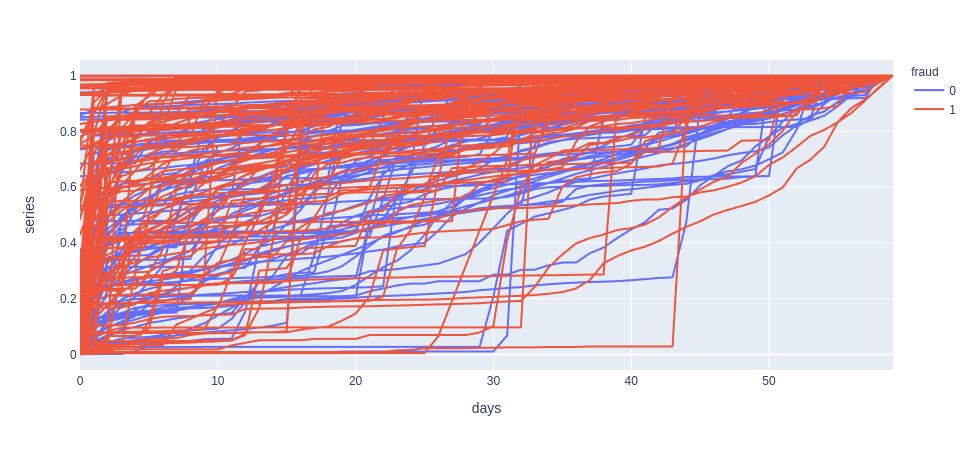

In [233]:
df_series_stack = pd.DataFrame(df_training_new_holders.iloc[:, :-1].stack()).reset_index().rename(columns={'level_1':'days', 0: 'series'})
df_series_stack = df_series_stack.merge(df_info[['ico','fraud']], on='ico')

fig = px.line(df_series_stack, x="days", y="series", color="fraud",
              line_group="ico", hover_name="ico")
fig.show()

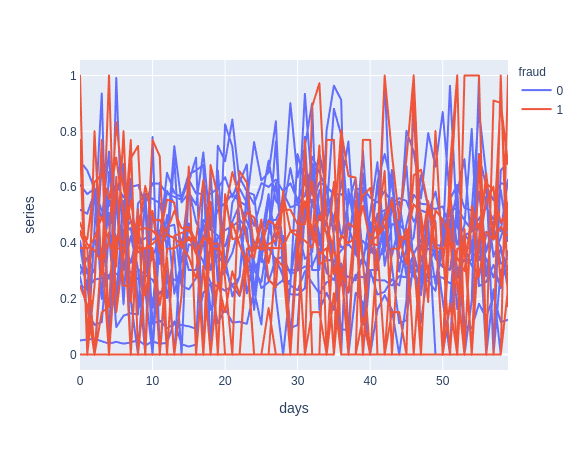

In [234]:
df_series_stack = pd.DataFrame(df_training_gasratio.iloc[:20, :-1].stack()).reset_index().rename(columns={'level_1':'days', 0: 'series'})
df_series_stack = df_series_stack.merge(df_info[['ico','fraud']], on='ico')

fig = px.line(df_series_stack, x="days", y="series", color="fraud",
              line_group="ico", hover_name="ico")
fig.show()

## 6. Dataset for training

In [235]:
df_training_new_holders = df_new_holders_60.merge(df_info[['ico','fraud']], left_index=True, right_on='ico')
df_training_new_holders.set_index('ico', inplace=True)

In [236]:
df_training_new_holders.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,fraud
ico,,,,,,,,,,,,,,,,,,,,,
0X,0.638636,0.643263,0.648842,0.652478,0.656504,0.662814,0.667782,0.674863,0.679190,0.686451,...,0.970634,0.976453,0.981461,0.985107,0.989293,0.992759,0.995894,0.997326,1.0,0
0XCERT,0.755084,0.783564,0.803355,0.854100,0.866349,0.935377,0.983407,0.990466,0.990768,0.991130,...,0.998914,0.999035,0.999155,0.999216,0.999698,0.999759,0.999759,0.999879,1.0,1
ABULABA,0.763140,0.883566,0.886228,0.889554,0.894877,0.896873,0.898869,0.900200,0.900865,0.906188,...,0.988024,0.988024,0.988024,0.988689,0.990020,0.992016,0.994677,0.998004,1.0,1
AELF,0.004278,0.036816,0.041683,0.045961,0.051299,0.055970,0.062485,0.068804,0.074064,0.078617,...,0.966716,0.972329,0.977314,0.981199,0.983947,0.987008,0.994034,0.996782,1.0,0
AERGO,0.021361,0.088260,0.140255,0.486670,0.529392,0.543633,0.551085,0.555224,0.561020,0.564994,...,0.991058,0.992052,0.993873,0.995363,0.996854,0.997682,0.998013,0.999006,1.0,0


In [237]:
df_training_gasratio = df_gasratio_60.merge(df_info[['ico','fraud']], left_index=True, right_on='ico')
df_training_gasratio.set_index('ico', inplace=True)

In [238]:
df_training_gasratio.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,fraud
ico,,,,,,,,,,,,,,,,,,,,,
0X,0.244923,0.237769,0.268525,0.273316,0.285068,0.288057,0.307181,0.296531,0.270373,0.284791,...,0.255048,0.273586,0.429546,0.398461,0.363659,0.566387,0.350308,0.419987,0.498195,0
0XCERT,0.381183,0.380757,0.000000,0.379050,0.000000,0.380117,0.381183,0.553493,0.380650,0.381183,...,0.000000,0.380117,0.380117,0.000000,0.715602,0.000000,0.910616,0.901801,0.683004,1
4NEW,0.435559,0.377706,0.417629,0.493963,0.406039,0.315349,0.800261,0.187745,0.421101,0.604811,...,0.547172,1.000000,0.000000,0.000000,0.401156,0.546551,0.601879,0.246144,0.545316,1
ABULABA,0.769236,0.000000,0.245460,0.769241,0.000000,0.423292,0.398417,0.769239,0.000000,0.274338,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.235850,1
AELF,0.519521,0.504579,0.581889,0.483936,0.727371,0.200961,0.550798,0.205726,0.541592,0.573569,...,0.450178,0.162508,0.427161,0.440935,0.713843,0.604965,0.553009,0.614437,0.606041,0


## 7. Creating the framework for testing

Parameters:

- [ ] Dataframe
- [ ] Split percentage
- [ ] Network
- [ ] Size array
- [ ] Epochs




In [260]:
# Binary Classification with Sonar Dataset: Standardized Larger
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Recall
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# larger model
def create_simple_dnn(size, metrics=Recall()):
    # create model
    model = Sequential()
    model.add(Dense(size, input_dim=size, activation='relu'))
    model.add(Dense(size/2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

simple_dnn = create_simple_dnn(60)


class ICODeepTraining:
    def __init__(self, dataframe, target_array, dl_model, size_array):
        
        self.dataframe = dataframe
        self.target_encoded = LabelEncoder().fit_transform(target_array)
        self.X_train = None
        self.y_train = None
        self.X_validation = None
        self.y_validation = None
        self.dl_model = dl_model
        self.size_array = size_array
        self.history = None
    
    def split_train_test(self, test_size=0.3):
        self.X_train, self.X_validation, self.y_train, self.y_validation = train_test_split(
        self.dataframe, self.target_encoded, test_size=test_size, random_state=161)
        
        self.X_train = self.X_train.values.astype(float)
        self.X_validation = self.X_validation.values.astype(float)
        
        
    def model_summary(self):
        self.dl_model.summary()
    
    def train_network(self, 
                      loss='binary_crossentropy', 
                      optimizer='adam',
                      metrics=['accuracy'] ,
                      epochs=50, 
                      verbose=1, 
                      batch_size=32):
        self.dl_model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
        self.history = self.dl_model.fit(self.X_train, 
                                         self.y_train, 
                                         epochs=epochs, 
                                         validation_data=(self.X_validation, self.y_validation),
                                         verbose=verbose,
                                         batch_size=batch_size)
    
        
    def plot_training(self, figsize=(1200,800)):
        df_training_metrics = pd.DataFrame(self.history.history)
        df_training_plotly = pd.DataFrame(
                                 df_training_metrics.stack()).reset_index(
                                 ).sort_values(by=['level_1', 'level_0']).rename(
                                 columns={'level_0':'days', 'level_1': 'metric', 0: 'values'})
        fig = px.line(df_training_plotly, x="days", y="values", color="metric",
              line_group="metric", hover_name="metric")
        fig.show()

### 7.1 Define the model

In [296]:
model = Sequential()
model.add(Dense(60, input_dim=60, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [297]:
ico_training = ICODeepTraining(df_training_new_holders.iloc[:, :-1],
                               df_training_new_holders.iloc[:, -1],
                               model,
                               60)
                               
ico_training.split_train_test()
ico_training.model_summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_142 (Dense)            (None, 60)                3660      
_________________________________________________________________
dense_143 (Dense)            (None, 30)                1830      
_________________________________________________________________
dense_144 (Dense)            (None, 20)                620       
_________________________________________________________________
dense_145 (Dense)            (None, 10)                210       
_________________________________________________________________
dense_146 (Dense)            (None, 1)                 11        
Total params: 6,331
Trainable params: 6,331
Non-trainable params: 0
_________________________________________________________________


Epoch 1/60
1/1 [==============================] - 1s 564ms/step - loss: 0.6844 - accuracy: 0.5659 - recall_54: 1.0000 - val_loss: 0.6681 - val_accuracy: 0.6607 - val_recall_54: 0.9487
Epoch 2/60
1/1 [==============================] - 0s 56ms/step - loss: 0.6803 - accuracy: 0.5504 - recall_54: 1.0000 - val_loss: 0.6610 - val_accuracy: 0.6786 - val_recall_54: 0.9744
Epoch 3/60
1/1 [==============================] - 0s 47ms/step - loss: 0.6778 - accuracy: 0.5426 - recall_54: 1.0000 - val_loss: 0.6552 - val_accuracy: 0.6964 - val_recall_54: 1.0000
Epoch 4/60
1/1 [==============================] - 0s 57ms/step - loss: 0.6759 - accuracy: 0.5426 - recall_54: 1.0000 - val_loss: 0.6505 - val_accuracy: 0.6964 - val_recall_54: 1.0000
Epoch 5/60
1/1 [==============================] - 0s 50ms/step - loss: 0.6739 - accuracy: 0.5426 - recall_54: 1.0000 - val_loss: 0.6470 - val_accuracy: 0.6607 - val_recall_54: 0.9487
Epoch 6/60
1/1 [==============================] - 0s 47ms/step - loss: 0.6718 - accu

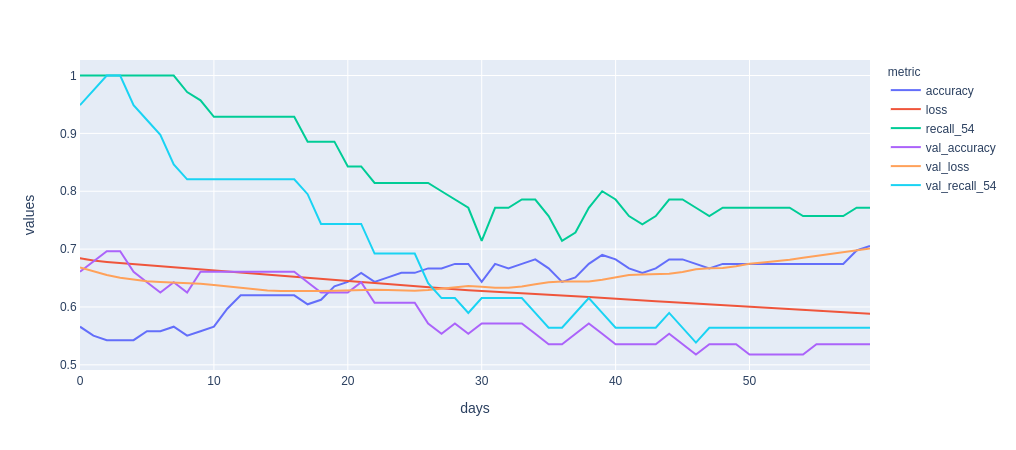

In [298]:
ico_training.train_network(loss='binary_crossentropy', 
                      optimizer='adam',
                      metrics=['accuracy', Recall()] ,
                      epochs=60,
                      verbose=1, 
                      batch_size=156)
ico_training.plot_training()

## Plotting the results